### 0. Import libraries

In [10]:
import numpy as np
import torch
torch.manual_seed(123)
from scipy import interpolate
import random
from scipy.integrate import solve_ivp
import json_tricks
from pathlib import Path


# set plotting params for the notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = [20, 10]
mpl.rcParams['figure.dpi'] = 300
np.set_printoptions(precision=5)
from matplotlib import cm
plt.rcParams.update(
        {
            "text.usetex": True,
            "font.family": "serif",
            "font.serif": ["Times"],
            "font.size": 12,
        }
    )

## 1. LASER Sparse

In [15]:
X_grid = np.genfromtxt('../data/Xgrid_lasersparse.csv', delimiter=',')
Y_grid = np.genfromtxt('../data/Ygrid_lasersparse.csv', delimiter=',')
XY_train = torch.from_numpy(np.genfromtxt('../data/XY_train_lasersparse.csv', delimiter=','))
XY_test = torch.from_numpy(np.genfromtxt('../data/XY_test_lasersparse.csv', delimiter=','))
UV_train = torch.from_numpy(np.genfromtxt('../data/UV_train_lasersparse.csv', delimiter=','))

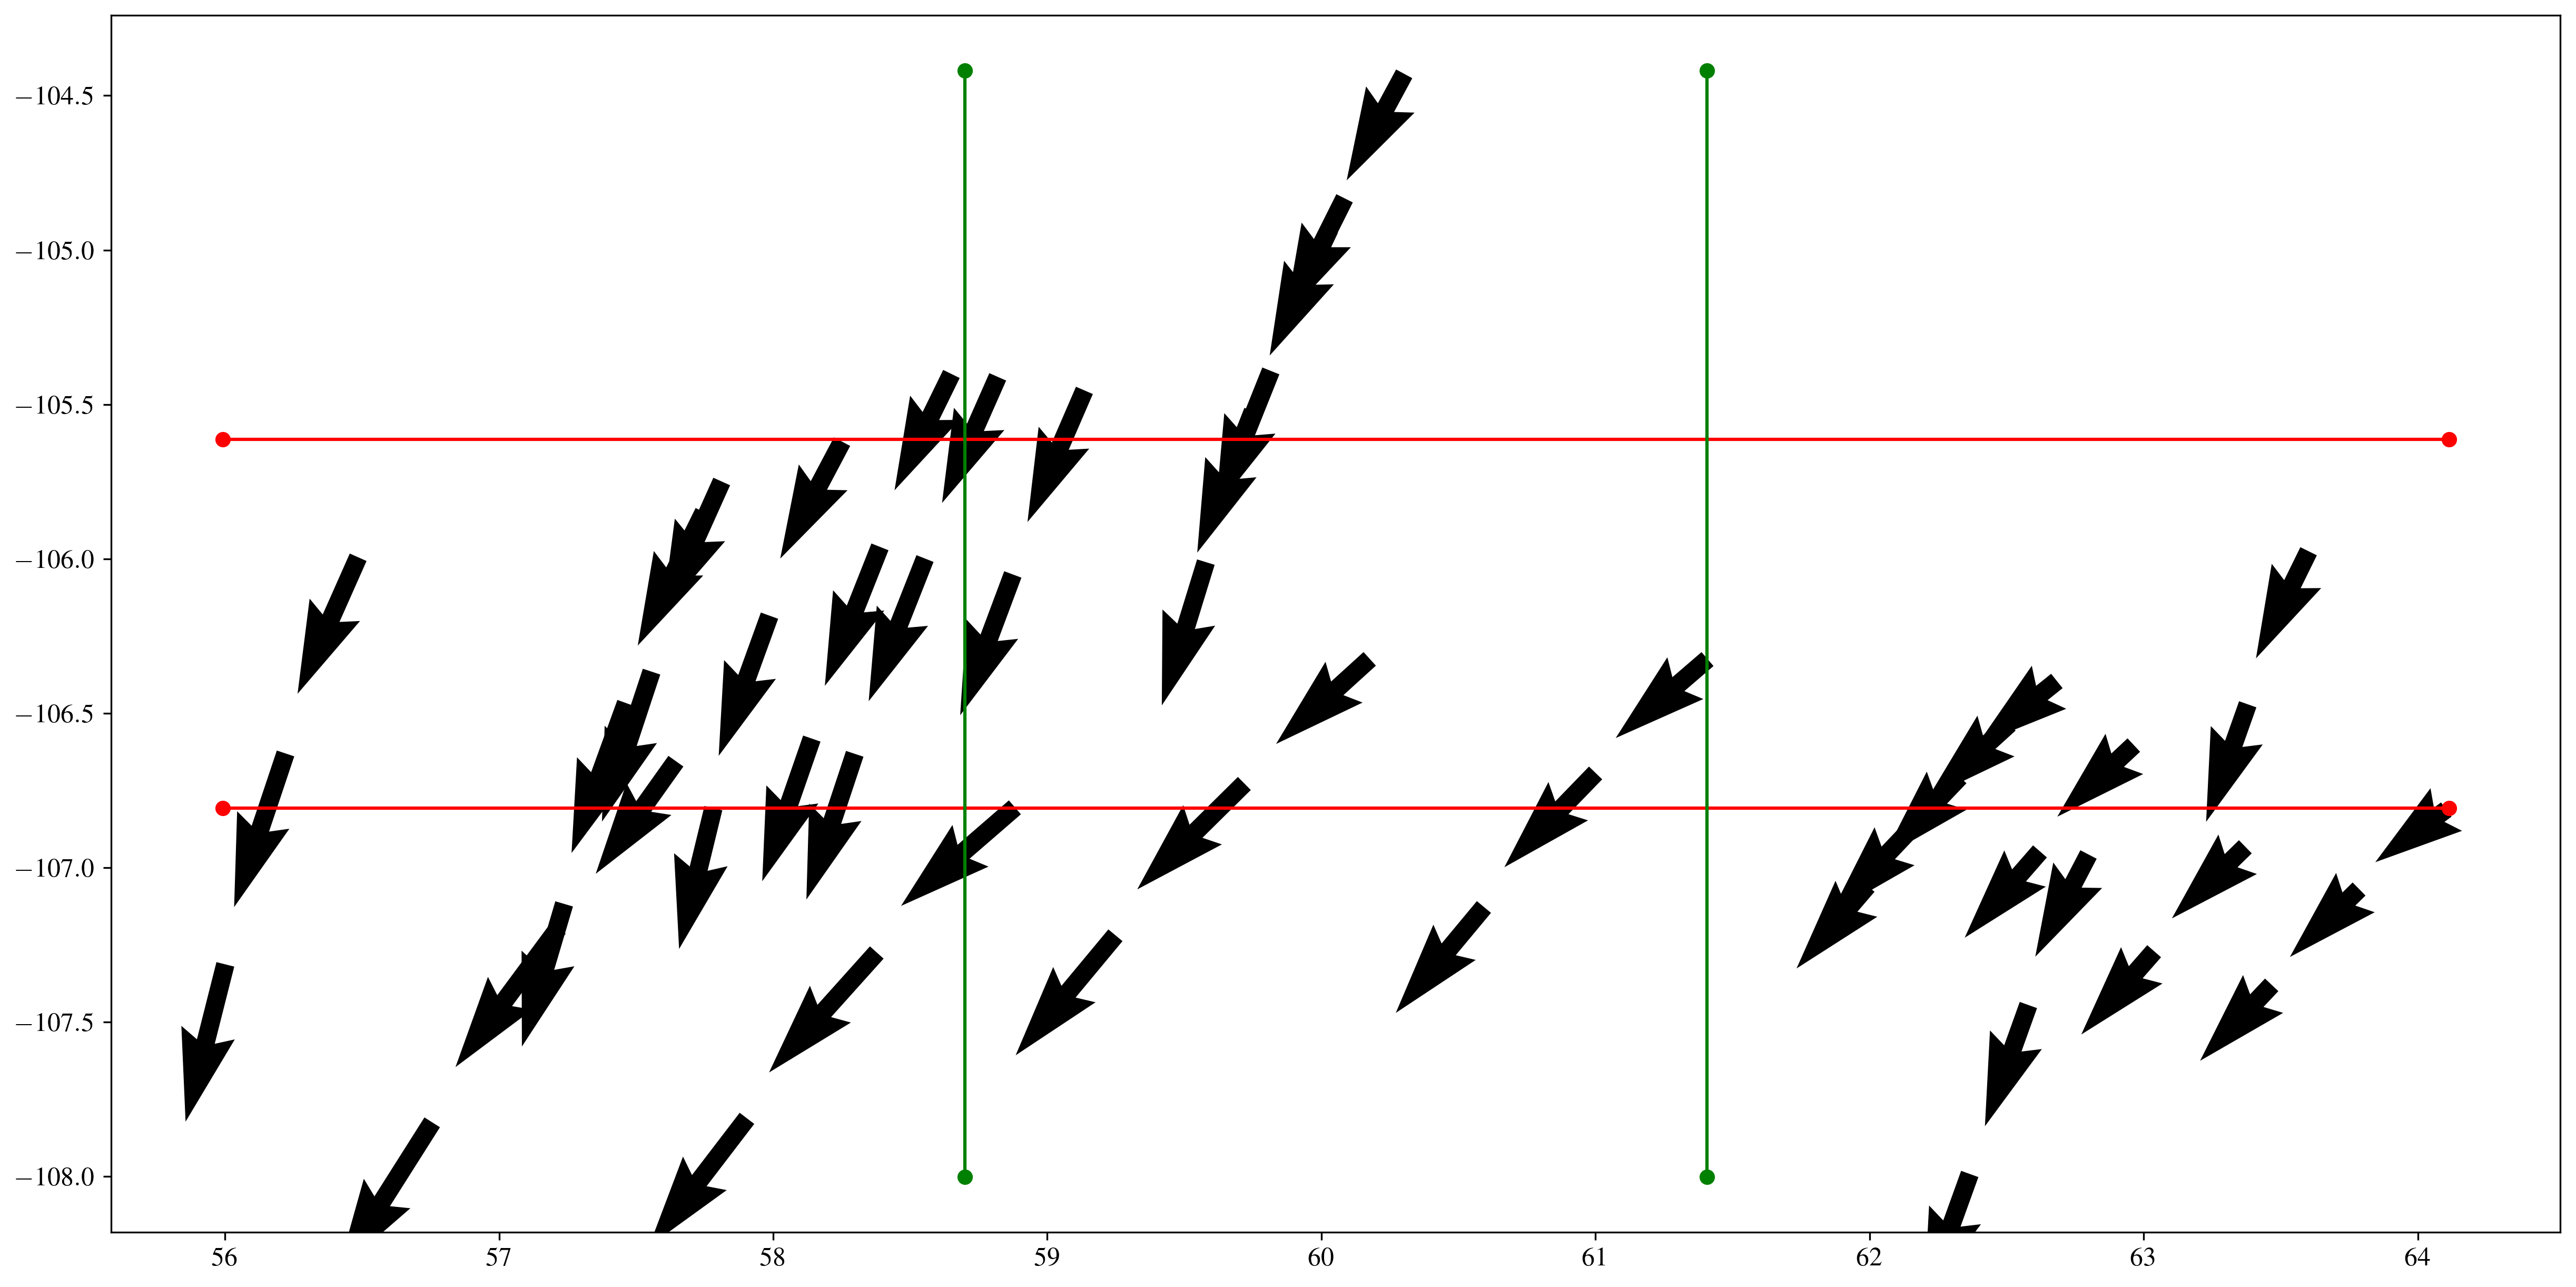

In [16]:
eps = 0.01
min_long = torch.min(XY_train[:,0]) - eps
max_long = torch.max(XY_train[:,0]) + eps
min_lat = torch.min(XY_train[:,1]) - eps
max_lat = torch.max(XY_train[:,1]) + eps

split_long = 3
offset_long = (abs(max_long - min_long))/split_long
split_lat = 3
offset_lat = (abs(max_lat - min_lat))/split_lat

plt.quiver(XY_train[:,0], XY_train[:,1], UV_train[:,0], UV_train[:,1])

p1, p2 = [min_long, max_long], [max_lat-offset_lat, max_lat-offset_lat]
p3, p4 = [min_long, max_long], [max_lat-2*offset_lat, max_lat-2*offset_lat]
p5, p6 = [min_long+offset_long, min_long+offset_long], [max_lat, min_lat]
p7, p8 = [min_long+2*offset_long, min_long+2*offset_long], [max_lat, min_lat]
plt.plot(p1, p2, p3, p4, marker='o', c='red')
plt.plot(p5, p6, p7, p8, marker='o', c='green')

In [17]:
lat_splits = [max_lat - i*offset_lat for i in range(split_lat+1)]
long_splits = [min_long + i*offset_long for i in range(split_long+1)]

In [21]:
train_splits = []
test_splits = []
for i in range(len(lat_splits)-1):
    for j in range(len(long_splits)-1):
        mask_long = (XY_train[:,0] >= long_splits[j]) & (XY_train[:,0] < long_splits[j+1])
        mask_lat = (XY_train[:,1] <= lat_splits[i]) & (XY_train[:,1] > lat_splits[i+1])
        mask = mask_long & mask_lat
        test_splits.append(mask)
        train_splits.append(~mask)
        
train_splits = [np.where(split)[0] for split in train_splits]
test_splits = [np.where(split)[0] for split in test_splits]

data_dict = {
        "train_splits": train_splits,
        "test_splits": test_splits,
        "XY": XY_train.numpy(),
        "UV": UV_train.numpy(),
        }

data_path = "../data/cv-iterables/"
save_path = str(Path(data_path, "lasersparse.json"))
json_tricks.dump(data_dict, save_path);

## 2. LASER FULL

In [24]:
X_grid = np.genfromtxt('../data/Xgrid_laserfull.csv', delimiter=',')
Y_grid = np.genfromtxt('../data/Ygrid_laserfull.csv', delimiter=',')
XY_train = torch.from_numpy(np.genfromtxt('../data/XY_train_laserfull.csv', delimiter=','))
XY_test = torch.from_numpy(np.genfromtxt('../data/XY_test_laserfull.csv', delimiter=','))
UV_train = torch.from_numpy(np.genfromtxt('../data/UV_train_laserfull.csv', delimiter=','))

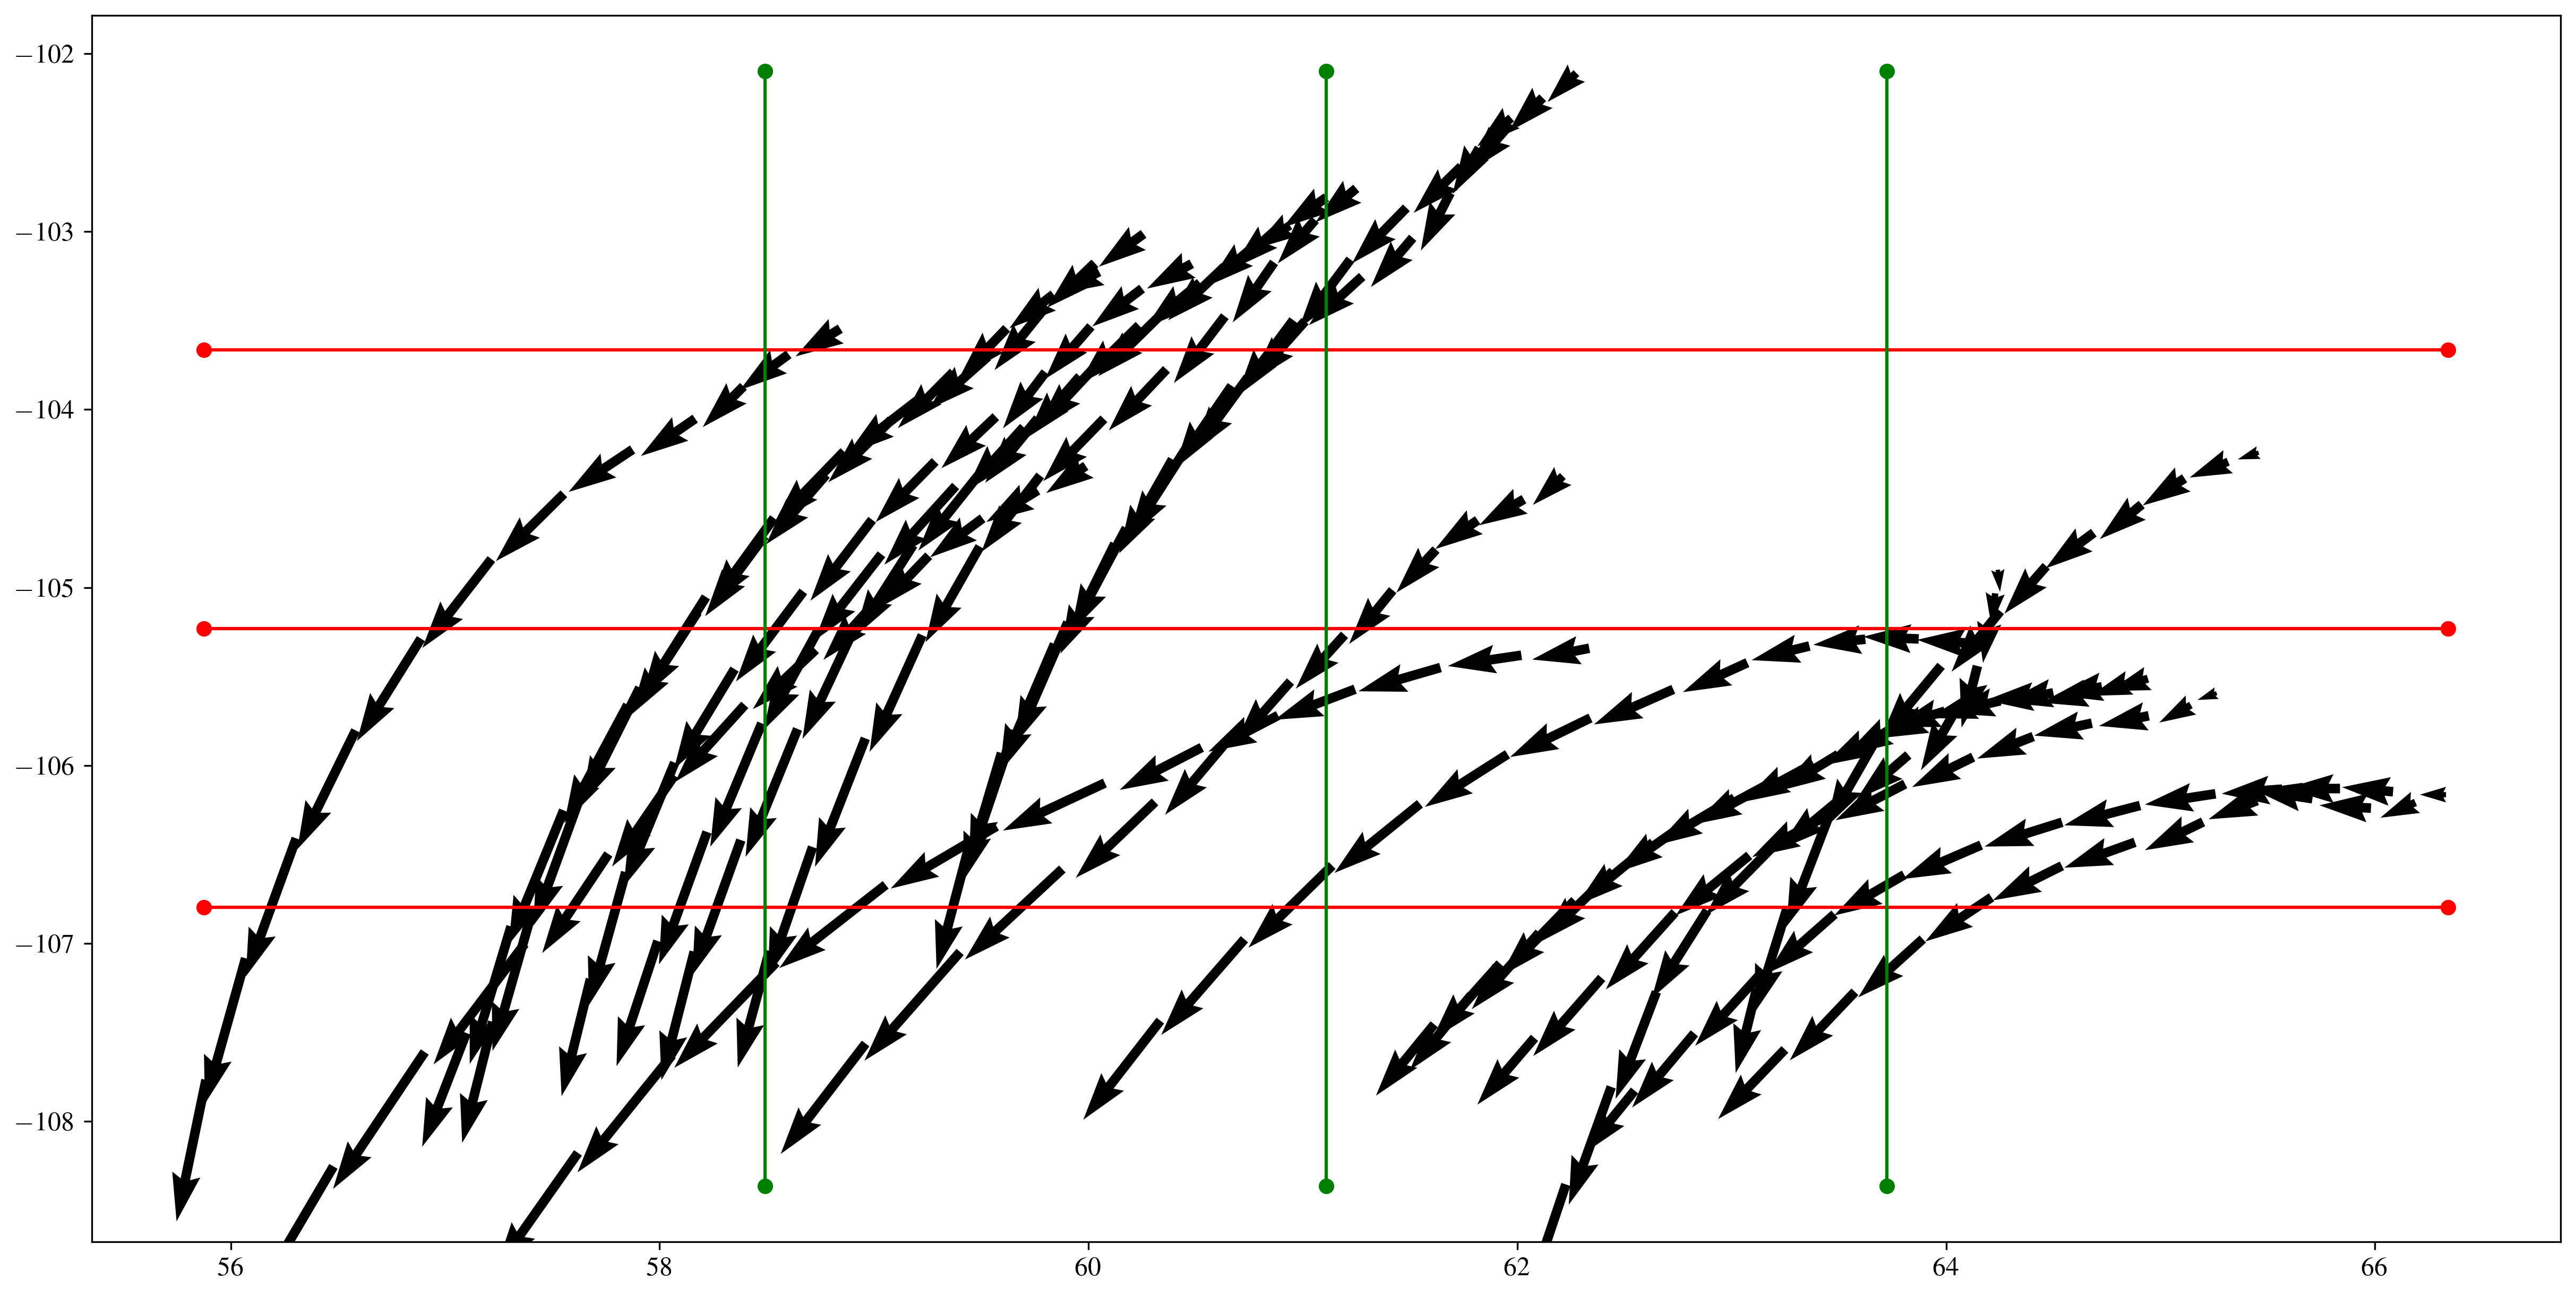

In [27]:
eps = 0.01
min_long = torch.min(XY_train[:,0]) - eps
max_long = torch.max(XY_train[:,0]) + eps
min_lat = torch.min(XY_train[:,1]) - eps
max_lat = torch.max(XY_train[:,1]) + eps

split_long = 4
offset_long = (abs(max_long - min_long))/split_long
split_lat = 4
offset_lat = (abs(max_lat - min_lat))/split_lat

plt.quiver(XY_train[:,0], XY_train[:,1], UV_train[:,0], UV_train[:,1])

p1, p2 = [min_long, max_long], [max_lat-offset_lat, max_lat-offset_lat]
p3, p4 = [min_long, max_long], [max_lat-2*offset_lat, max_lat-2*offset_lat]
p5, p6 = [min_long, max_long], [max_lat-3*offset_lat, max_lat-3*offset_lat]
p7, p8 = [min_long+offset_long, min_long+offset_long], [max_lat, min_lat]
p9, p10 = [min_long+2*offset_long, min_long+2*offset_long], [max_lat, min_lat]
p11, p12 = [min_long+3*offset_long, min_long+3*offset_long], [max_lat, min_lat]
plt.plot(p1, p2, p3, p4, p5, p6, marker='o', c='red')
plt.plot(p7, p8, p9, p10, p11, p12, marker='o', c='green')

In [28]:
lat_splits = [max_lat - i*offset_lat for i in range(split_lat+1)]
long_splits = [min_long + i*offset_long for i in range(split_long+1)]

In [29]:
train_splits = []
test_splits = []
for i in range(len(lat_splits)-1):
    for j in range(len(long_splits)-1):
        mask_long = (XY_train[:,0] >= long_splits[j]) & (XY_train[:,0] < long_splits[j+1])
        mask_lat = (XY_train[:,1] <= lat_splits[i]) & (XY_train[:,1] > lat_splits[i+1])
        mask = mask_long & mask_lat
        test_splits.append(mask)
        train_splits.append(~mask)
        
train_splits = [np.where(split)[0] for split in train_splits]
test_splits = [np.where(split)[0] for split in test_splits]

data_dict = {
        "train_splits": train_splits,
        "test_splits": test_splits,
        "XY": XY_train.numpy(),
        "UV": UV_train.numpy(),
        }

data_path = "../data/cv-iterables/"
save_path = str(Path(data_path, "laserfull.json"))
json_tricks.dump(data_dict, save_path);

## 3. GLAD SPARSE

In [31]:
X_grid = np.genfromtxt('../data/Xgrid_gladsparse.csv', delimiter=',')
Y_grid = np.genfromtxt('../data/Ygrid_gladsparse.csv', delimiter=',')
XY_train = torch.from_numpy(np.genfromtxt('../data/XY_train_gladsparse.csv', delimiter=','))
XY_test = torch.from_numpy(np.genfromtxt('../data/XY_test_gladsparse.csv', delimiter=','))
UV_train = torch.from_numpy(np.genfromtxt('../data/UV_train_gladsparse.csv', delimiter=','))

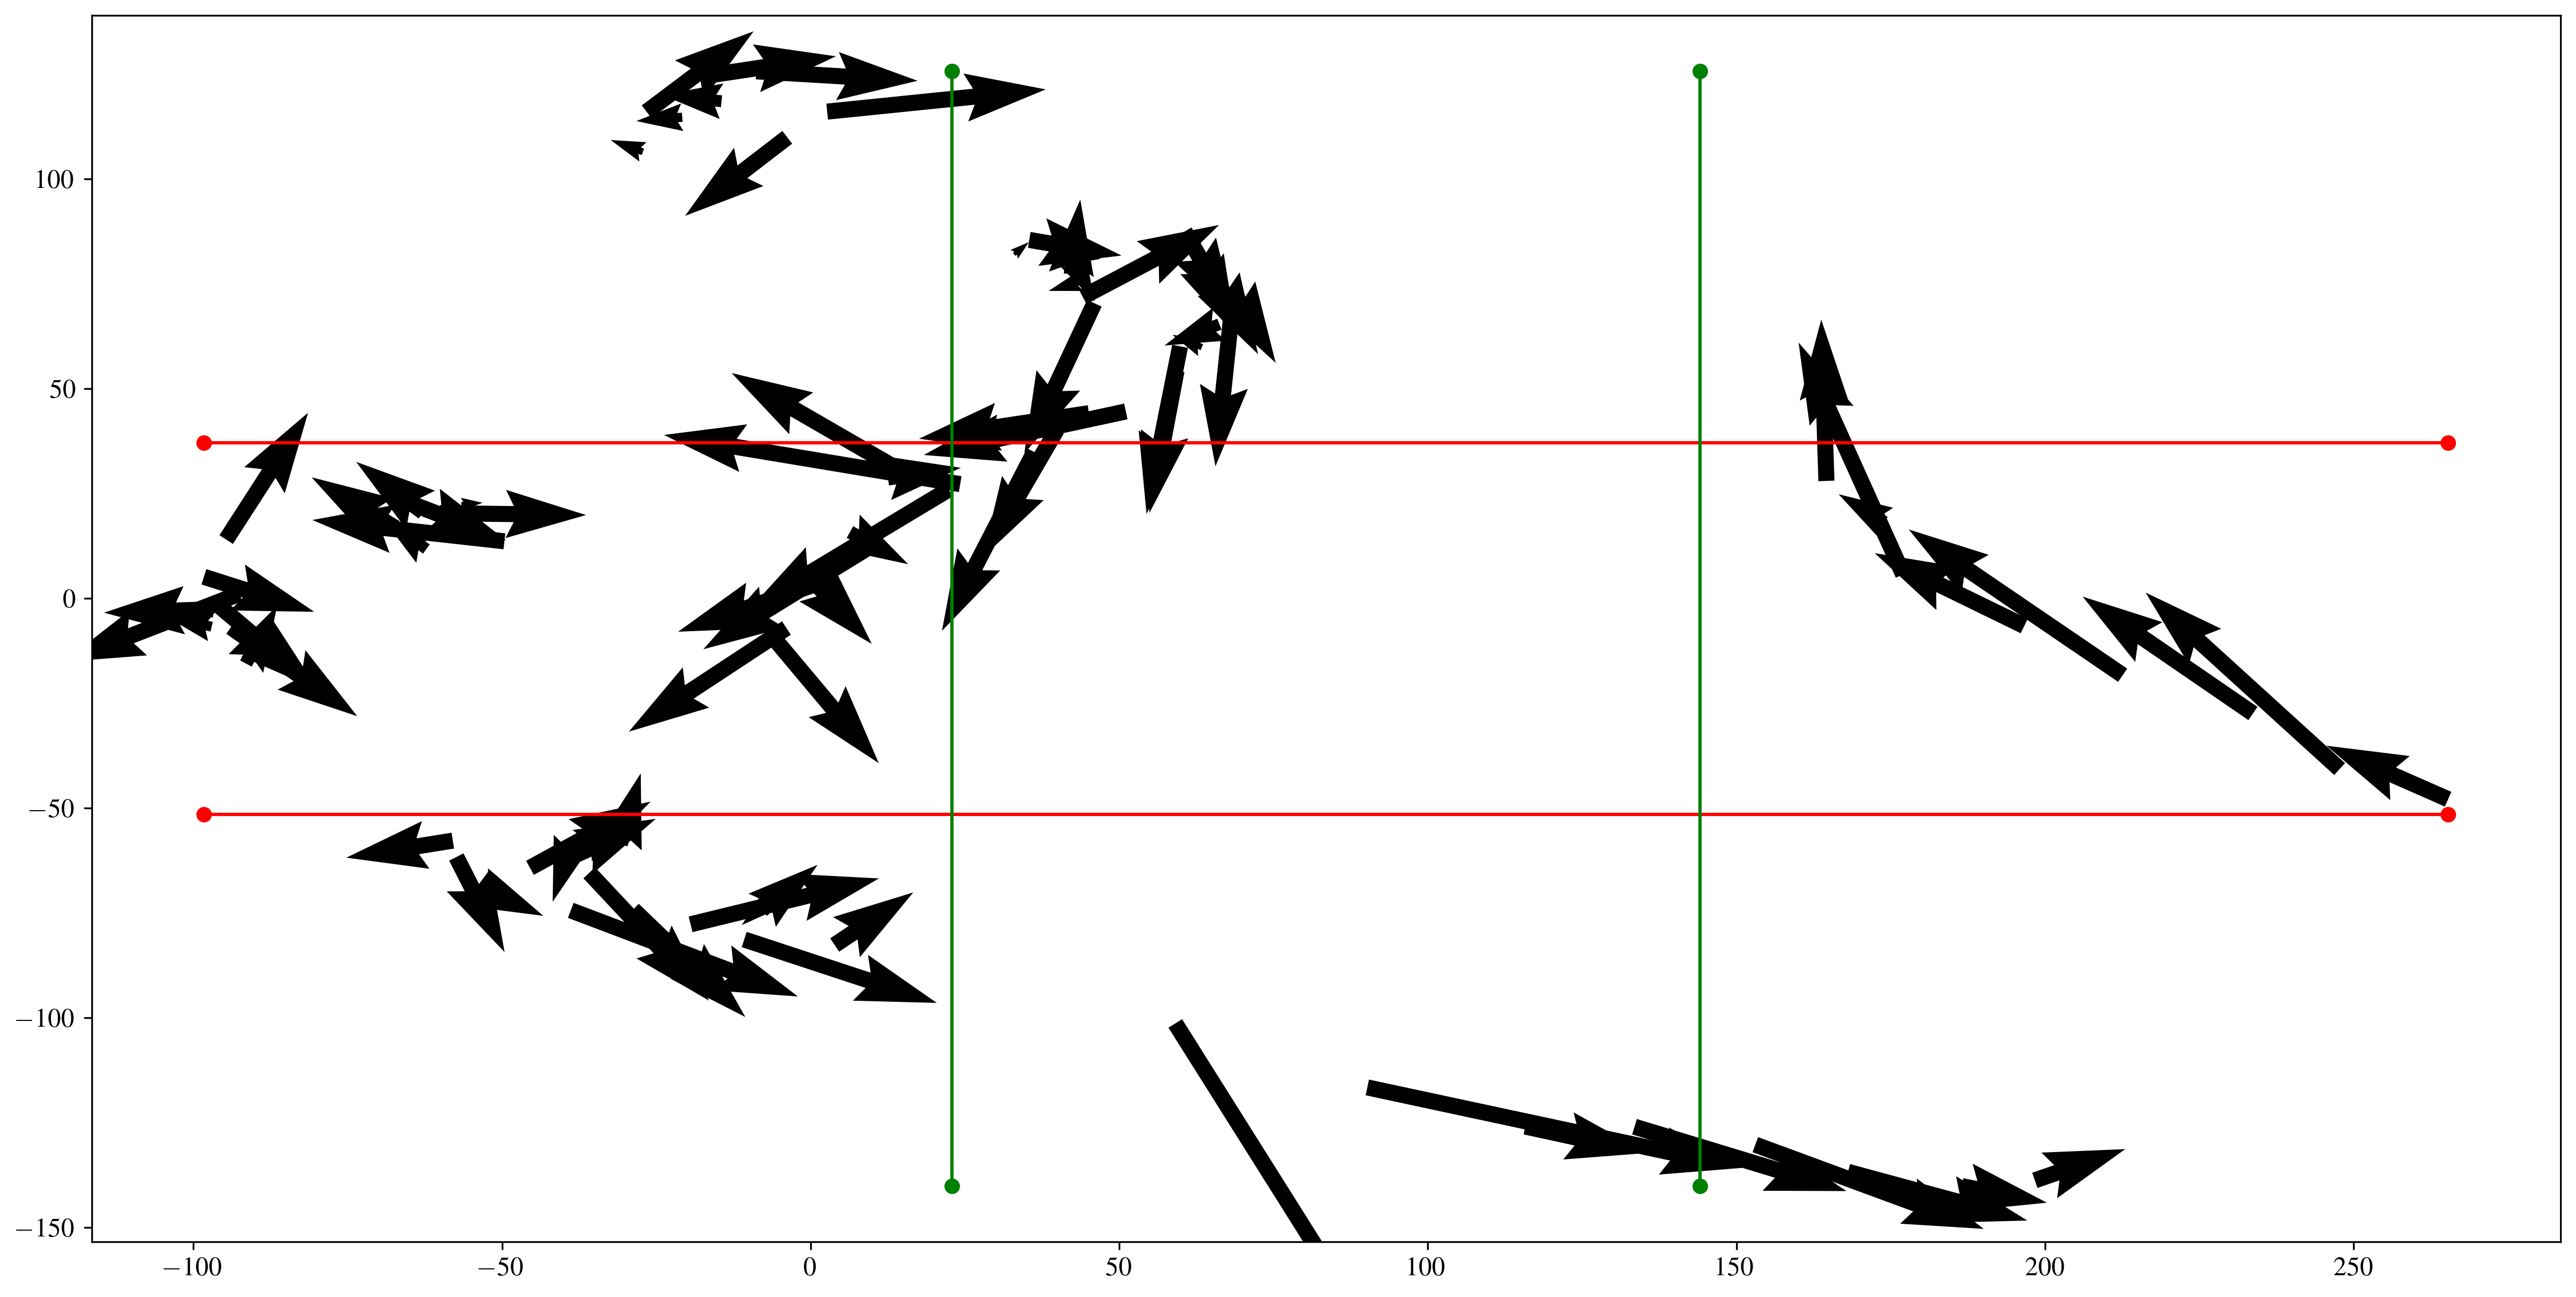

In [32]:
eps = 0.01
min_long = torch.min(XY_train[:,0]) - eps
max_long = torch.max(XY_train[:,0]) + eps
min_lat = torch.min(XY_train[:,1]) - eps
max_lat = torch.max(XY_train[:,1]) + eps

split_long = 3
offset_long = (abs(max_long - min_long))/split_long
split_lat = 3
offset_lat = (abs(max_lat - min_lat))/split_lat

plt.quiver(XY_train[:,0], XY_train[:,1], UV_train[:,0], UV_train[:,1])

p1, p2 = [min_long, max_long], [max_lat-offset_lat, max_lat-offset_lat]
p3, p4 = [min_long, max_long], [max_lat-2*offset_lat, max_lat-2*offset_lat]

p11, p12 = [min_long+offset_long, min_long+offset_long], [max_lat, min_lat]
p13, p14 = [min_long+2*offset_long, min_long+2*offset_long], [max_lat, min_lat]

plt.plot(p1, p2, p3, p4, marker='o', c='red')
plt.plot(p11, p12, p13, p14, marker='o', c='green')

In [33]:
lat_splits = [max_lat - i*offset_lat for i in range(split_lat+1)]
long_splits = [min_long + i*offset_long for i in range(split_long+1)]

train_splits = []
test_splits = []
for i in range(len(lat_splits)-1):
    for j in range(len(long_splits)-1):
        mask_long = (XY_train[:,0] >= long_splits[j]) & (XY_train[:,0] < long_splits[j+1])
        mask_lat = (XY_train[:,1] <= lat_splits[i]) & (XY_train[:,1] > lat_splits[i+1])
        mask = mask_long & mask_lat
        test_splits.append(mask)
        train_splits.append(~mask)
        
train_splits = [np.where(split)[0] for split in train_splits]
test_splits = [np.where(split)[0] for split in test_splits]

data_dict = {
        "train_splits": train_splits,
        "test_splits": test_splits,
        "XY": XY_train.numpy(),
        "UV": UV_train.numpy(),
        }

data_path = "../data/cv-iterables/"
save_path = str(Path(data_path, "gladsparse.json"))
json_tricks.dump(data_dict, save_path);

## 4. GLAD FULL

In [34]:
X_grid = np.genfromtxt('../data/Xgrid_gladfull.csv', delimiter=',')
Y_grid = np.genfromtxt('../data/Ygrid_gladfull.csv', delimiter=',')
XY_train = torch.from_numpy(np.genfromtxt('../data/XY_train_gladfull.csv', delimiter=','))
XY_test = torch.from_numpy(np.genfromtxt('../data/XY_test_gladfull.csv', delimiter=','))
UV_train = torch.from_numpy(np.genfromtxt('../data/UV_train_gladfull.csv', delimiter=','))

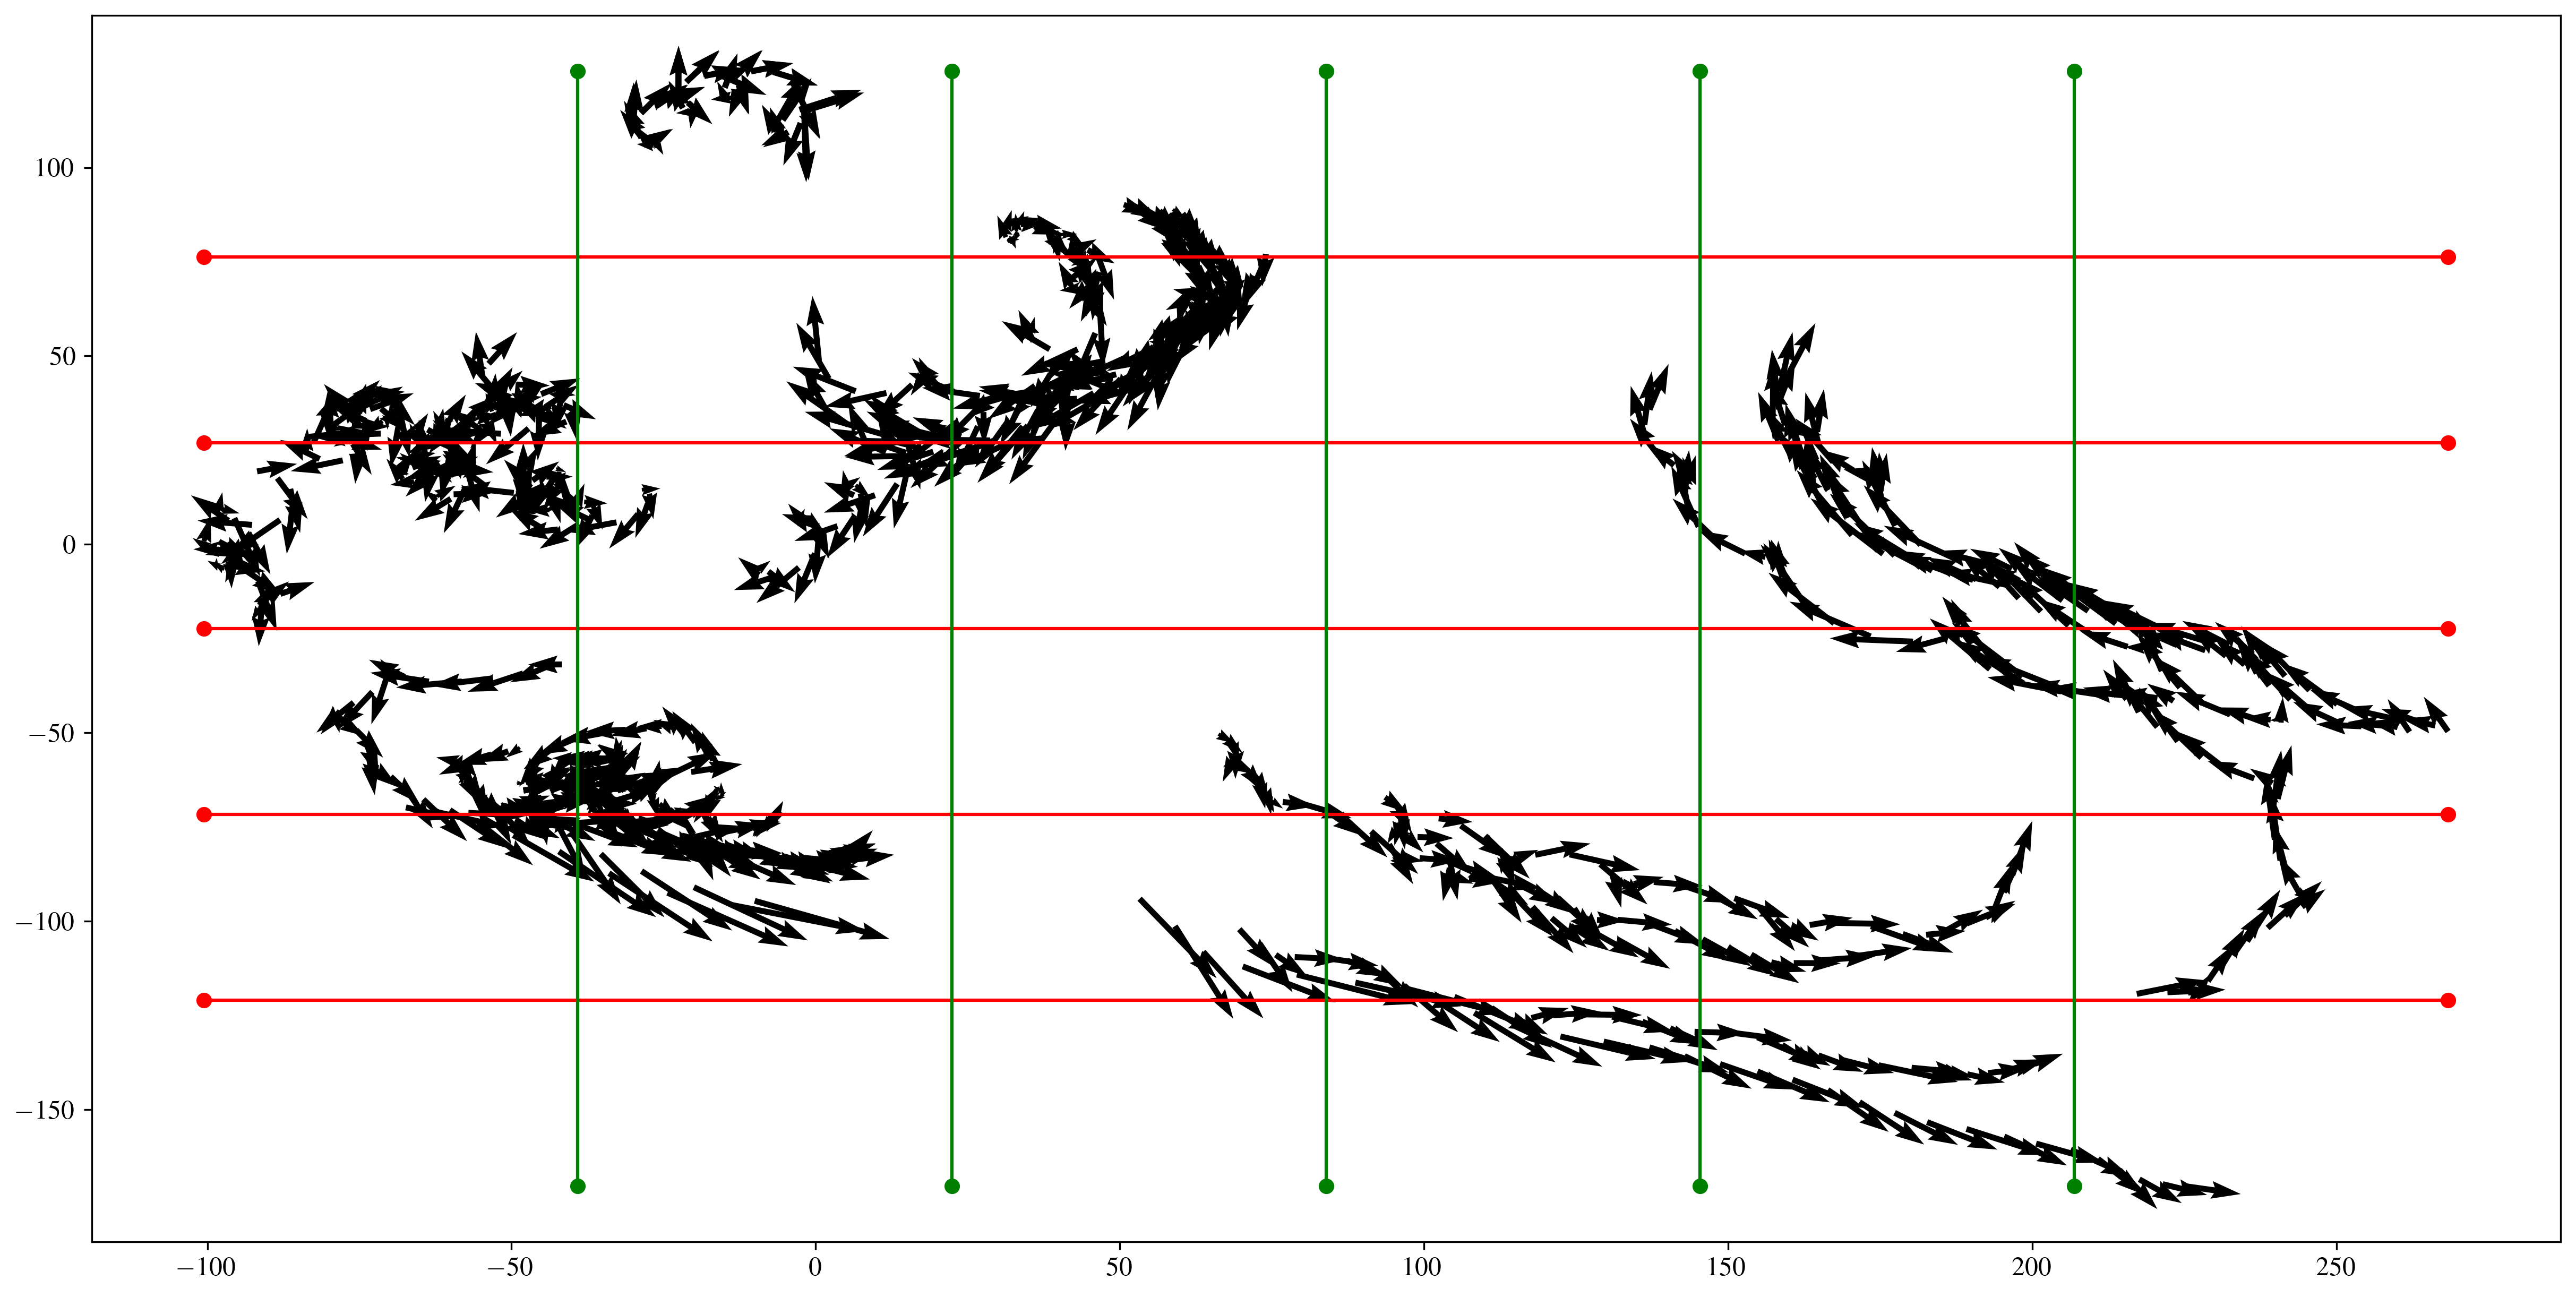

In [35]:
eps = 0.01
min_long = torch.min(XY_train[:,0]) - eps
max_long = torch.max(XY_train[:,0]) + eps
min_lat = torch.min(XY_train[:,1]) - eps
max_lat = torch.max(XY_train[:,1]) + eps

split_long = 6
offset_long = (abs(max_long - min_long))/split_long
split_lat = 6
offset_lat = (abs(max_lat - min_lat))/split_lat

plt.quiver(XY_train[:,0], XY_train[:,1], UV_train[:,0], UV_train[:,1])

p1, p2 = [min_long, max_long], [max_lat-offset_lat, max_lat-offset_lat]
p3, p4 = [min_long, max_long], [max_lat-2*offset_lat, max_lat-2*offset_lat]
p5, p6 = [min_long, max_long], [max_lat-3*offset_lat, max_lat-3*offset_lat]
p7, p8 = [min_long, max_long], [max_lat-4*offset_lat, max_lat-4*offset_lat]
p9, p10 = [min_long, max_long], [max_lat-5*offset_lat, max_lat-5*offset_lat]

p11, p12 = [min_long+offset_long, min_long+offset_long], [max_lat, min_lat]
p13, p14 = [min_long+2*offset_long, min_long+2*offset_long], [max_lat, min_lat]
p15, p16 = [min_long+3*offset_long, min_long+3*offset_long], [max_lat, min_lat]
p17, p18 = [min_long+4*offset_long, min_long+4*offset_long], [max_lat, min_lat]
p19, p20 = [min_long+5*offset_long, min_long+5*offset_long], [max_lat, min_lat]

plt.plot(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, marker='o', c='red')
plt.plot(p11, p12, p13, p14, p15, p16, p17, p18, p19, p20, marker='o', c='green')

In [36]:
lat_splits = [max_lat - i*offset_lat for i in range(split_lat+1)]
long_splits = [min_long + i*offset_long for i in range(split_long+1)]

train_splits = []
test_splits = []
for i in range(len(lat_splits)-1):
    for j in range(len(long_splits)-1):
        mask_long = (XY_train[:,0] >= long_splits[j]) & (XY_train[:,0] < long_splits[j+1])
        mask_lat = (XY_train[:,1] <= lat_splits[i]) & (XY_train[:,1] > lat_splits[i+1])
        mask = mask_long & mask_lat
        test_splits.append(mask)
        train_splits.append(~mask)
        
train_splits = [np.where(split)[0] for split in train_splits]
test_splits = [np.where(split)[0] for split in test_splits]

data_dict = {
        "train_splits": train_splits,
        "test_splits": test_splits,
        "XY": XY_train.numpy(),
        "UV": UV_train.numpy(),
        }

data_path = "../data/cv-iterables/"
save_path = str(Path(data_path, "gladfull.json"))
json_tricks.dump(data_dict, save_path);

In [37]:
test_splits

[array([], dtype=int64),
 array([383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395,
        396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408,
        409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
        422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
        435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446]),
 array([543, 544, 545, 546, 547, 548, 549, 550, 575, 576, 577, 578, 579,
        580, 581, 607, 608, 609, 610, 611, 612, 613, 639, 671, 672, 673,
        674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686,
        687, 688, 689, 694, 695, 696, 703, 704, 705, 706, 707, 708, 709,
        735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747,
        748, 749, 750, 767, 768, 769, 770, 771, 772, 773]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([ 63,  64,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  8